# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

pd.set_option('display.max_columns', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Импортируем все библиотеки в отдельную ячейку и создадим переменную old_data с исходным датасетом.
</div>

In [3]:
old_data = data.copy()

Откроем датасет, используя разделитель. Импортируем библиотеки pandas, seaborn, matplotlib. Добавим опцию для отображения всех столбцов. Воспользуемся функцией info для изучения параметров. Уже можно сделать первые выводы о том, что есть пропущенные данные, в столбцах используются различные типы данных. 

In [4]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выведем на экран первые пять строк датасета используя метод head.

In [5]:
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Воспользуемся инструментом isna().sum()) для подсчёта количества пропущенных значений в каждом столбце. Теперь мы знаем количество пропусков и можем приступить к их обработке. 

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Построим  общую гистограмму для всех столбцов таблицы. 
</div>

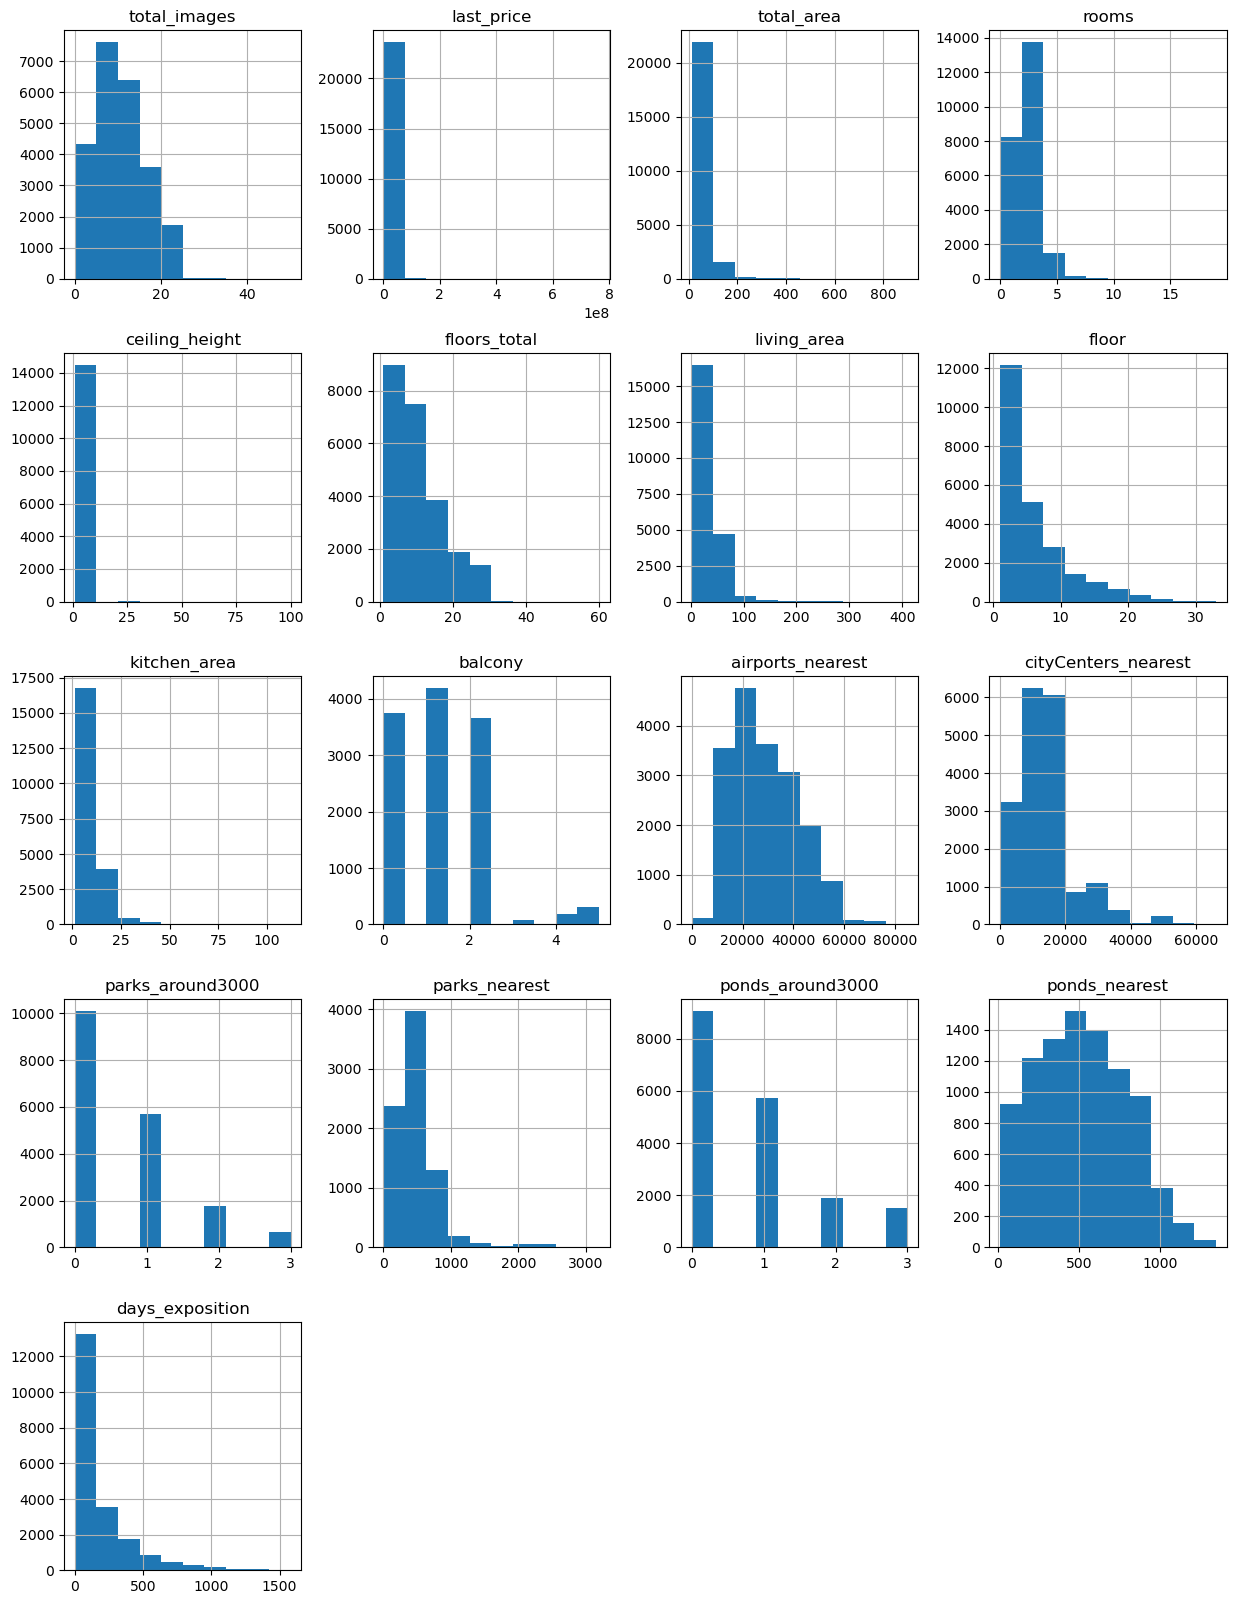

In [6]:
data.hist(figsize=(15, 20));

Вместе с работой над пропусками проведем проверку всех столбцов на наличие аномалий.

In [7]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

В столбце total_images содержится количество фотографий в опубликованном объявлении(минимальное значение - 0, максимальное - 50.) Аномалии не выявлены.

In [8]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [9]:
data['last_price'] = data['last_price'].astype('Int64')

In [10]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

В столбце last_price указана цена на момент снятия с публикации. Преобразуем данный столбец в формат int. 

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> В столбце total_area указана общая площадь объекта недвижимости. Минимальное значение 12 кв. метров, максимальное - 900 кв. метров. Уберем аномалии, объекты где площадь более 350 метров. 
</div>

In [11]:
data = data[data['total_area'] <= 350]

In [12]:
data['total_area'].describe()

count    23658.000000
mean        59.671705
std         31.459337
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        347.500000
Name: total_area, dtype: float64

Проверим столбец дата first_day_exposition (дата публикации) на наличие аномалий. Дата публикации первого объявления 2014 год, а последнего 2019. 

In [13]:
data['first_day_exposition'].describe()

count                   23658
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

Изучим столбец количество комнат (rooms) на присутствие аномалий. 

In [14]:
data['rooms'].describe()

count    23658.000000
mean         2.062516
std          1.052467
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

В столбце rooms обнаружены аномальные значения: количество комнат = 0. Отбросим строки с аномальными значениями. 

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Также удалим аномальные значения, объявления где количество комнат более 8.
</div>

In [15]:
data = data[data['rooms'] != 0]
data = data[data['rooms'] <= 8]

In [16]:
data['rooms'].describe()

count    23449.000000
mean         2.075099
std          1.019947
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

Поработаем с пропущенными значениями в столбце ceiling_height (высота потолков). Для этого применим метод unique и изучим уникальные значения в столбце. 

In [17]:
display(data['ceiling_height'].unique())

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   3.65,   3.18,   3.35,   2.3 ,
         3.57,   2.48,   2.62,   2.82,   3.98,   2.63,   3.83,   3.52,
         3.95,   3.75,   2.88,   3.67,   3.87,   3.66,   3.85,   3.86,
         4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,  32.  ,   3.08,
         3.68,   3.07,   3.37,   3.09,   8.  ,   3.16,   3.26,   3.34,
      

В столбце присутствуют аномально большие значения потолков. Вероятно пользователи при заполнении объявления допустили ошибки. Разделим значения больше либо равные 24 метра на 10, чтобы уменьшить количество аномалий. 

In [18]:
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] = data['ceiling_height'] / 10

Вновь обратимся к методу unique, чтобы отыскать и удалить оставшиеся аномальные значения. 

In [19]:
display(data['ceiling_height'].unique())

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  3.65,  3.18,  3.35,  2.3 ,  3.57,  2.48,
        2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,  3.75,  2.88,
        3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,  4.8 ,  4.5 ,
        4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,  8.  ,  3.16,
        3.26,  3.34,  2.81,  3.44,  2.97,  4.37,  2.68,  3.9 ,  3.22,
        3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.14,  3.32,
        1.2 ,  8.3 ,

In [20]:
data = data[(data['ceiling_height'] != 20) & (data['ceiling_height'] != 22.6) 
            & (data['ceiling_height'] != 8.3) & (data['ceiling_height'] != 14) 
            & (data['ceiling_height'] != 10) & (data['ceiling_height'] != 10.3)
            & (data['ceiling_height'] != 8) & (data['ceiling_height'] != 6)
           & (data['ceiling_height'] != 1) & (data['ceiling_height'] != 1.2)
           & (data['ceiling_height'] != 1.75) & (data['ceiling_height'] != 5.60)
           & (data['ceiling_height'] != 5.50) & (data['ceiling_height'] != 5.30)
           & (data['ceiling_height'] != 5.20) & (data['ceiling_height'] != 5.00)
           & (data['ceiling_height'] != 4.90) & (data['ceiling_height'] != 4.80)
           & (data['ceiling_height'] != 4.70) & (data['ceiling_height'] != 4.60)]

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Также удалим аномальные значения, объявления где высота потолков более 4.5 метров и менее 2.0 метров. 
</div>

Воспользуемся методом describe и оценим оставшиеся данные.

In [21]:
data['ceiling_height'].describe()

count    14362.000000
mean         2.722770
std          0.266836
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          4.500000
Name: ceiling_height, dtype: float64

Заполним пропуски в столбце высота потолков (ceiling_height). Для этого возьмем среднее значение потолков по России (оно варьируется от 2.5 до 2.7. Заполним пропуски значением 2.6). После замены убедимся в отсуствии пропусков методом isna().sum()). 

In [22]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.6)

display(data['ceiling_height'].isna().sum())

0

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> В столбце floors_total (всего этажей в доме) присуствуют пропущенные значения. Применив метод desribe видно что минимальное значение - 1, максимальное - 60. Пропуски не заполняем.
</div>

In [23]:
data['floors_total'].describe()

count    23344.000000
mean        10.630826
std          6.569570
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [24]:
display(data['floors_total'].isna().sum())

83

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Пропуски в столбце floors_total не заполняем. 
</div>

Столбец living_area содержит значения жилой площади в квадратных метрах. Проведем анализ столбца жилая площадь (living_area). Минимальное значение - 2, максимальное - 260. Значение - 2 кв. метрах очень похоже на попытку продажи микродоли в помещении, особенно учитывая тот факт что: С 1 сентября 2022 года вступают в силу изменения в Жилищном кодексе РФ, касающиеся минимального размера площади доли собственности. Новый закон устанавливает норму – не менее шести квадратных метров общей площади жилого помещения на каждого сособственника. А наш датасет содержит объявления опубликованные в период с 2014 по 2019 года (когда данная норма еще не существовала). Учитывая данный факт, удалять значения не будем.

In [25]:
data['living_area'].describe()

count    21552.00000
mean        34.19724
std         20.09466
min          2.00000
25%         18.70000
50%         30.00000
75%         42.30000
max        260.00000
Name: living_area, dtype: float64

In [26]:
display(data['living_area'].isna().sum())

1875

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Пропуски в столбце living_area не заполняем. Данные могут быть искажены и в результате исследования будут получены недостоверные результаты. 
</div>

In [27]:
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               83
living_area              1875
floor                       0
is_apartment            20665
studio                      0
open_plan                   0
kitchen_area             2067
balcony                 11409
locality_name              49
airports_nearest         5456
cityCenters_nearest      5435
parks_around3000         5434
parks_nearest           15426
ponds_around3000         5434
ponds_nearest           14428
days_exposition          3148
dtype: int64

Изучим столбец - этаж (floor). Минимальное значение - 1. Максимальное - 30. Аномалии не выявлены.

In [28]:
data['floor'].describe()

count    23427.000000
mean         5.869595
std          4.865407
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Столбец is_apartment содержит значение является ли данный объект недвижимости апартаментами или нет. Заполним пропуски значением 'unknown'. Аномалии в данном столбце отсутствуют.

In [29]:
data['is_apartment'].describe()

count      2762
unique        2
top       False
freq       2714
Name: is_apartment, dtype: object

In [30]:
data['is_apartment'] = data['is_apartment'].fillna(False)

display(data['is_apartment'].isna().sum())

0

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Если в столбце апартаментов пропуск - вероятно,что это не апартаменты. Пропуски в столбце is_apartment заполним значением False.
</div>

В столбце studio (квартира - студия) аномалии отсутствуют. 

In [31]:
data['studio'].describe()

count     23427
unique        2
top       False
freq      23416
Name: studio, dtype: object

В столбце open_plan (свободная планировка) аномалии отсутствуют.

In [32]:
data['open_plan'].describe()

count     23427
unique        2
top       False
freq      23419
Name: open_plan, dtype: object

Изучим значения в столбце kitchen_area (площадь кухни): Минимальное значение 1,3 метра а максимальное 112. Данные значения не противоречат логике, ведь существуют планировки квартир где кухня располагается в одной комнате с жилой.(характерно для квартир менее 20 кв. метров.) Максимальное значение 112 квадратных метров, что также возможно особенно для загородной недвижимости. Заполним пропуски средним значением. 

In [33]:
data['kitchen_area'].describe()

count    21360.000000
mean        10.514495
std          5.708789
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [34]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].mean())

display(data['kitchen_area'].isna().sum())

0

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Также удалим аномальные значения, объявления где площадь кухни более 70 метров.
</div>

In [35]:
data = data[data['kitchen_area'] <= 70]

Изучим столбец balcony — число балконов. Воспользуемся методом unique. Как видно наименьшее число балконов - 0 ,а максимальное - 5. Заполним пропуски нулями.

In [36]:
display(data['balcony'].unique())

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [37]:
data['balcony'] = data['balcony'].fillna(0)

display(data['balcony'].isna().sum())


0

Далее поработаем со столбцом locality_name — название населённого пункта. Начнем с применения метода unique и выведем все уникальные значения. 

В данном столбце содержится большое количество неявных дубликатов. Начнем с того, что заполним пропущенные значения 'unknown' и выполним замену подстрок методом str.replace. Проверим, что пропущенные значения отсуствуют после проведенных операций. 

In [38]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

In [39]:
display(data['locality_name'].isna().sum())

49

Избавимся от неявных дубликатов в столбце locality_name. Для этого изучим все значения с помощь метода unique и произведем замену дубликатов методом replace. 

In [40]:
display(data['locality_name'].unique())

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет

In [41]:
data['locality_name'] = data['locality_name'].replace('Мурино','посёлок Мурино')
data['locality_name'] = data['locality_name'].replace('Кудрово','деревня Кудрово')
data['locality_name'] = data['locality_name'].replace('Коммунар','посёлок Коммунары')
data['locality_name'] = data['locality_name'].replace('деревня Фёдоровское','городской посёлок Фёдоровское')
data['locality_name'] = data['locality_name'].replace('садовое товарищество Новая Ропша','посёлок Ропша')
data['locality_name'] = data['locality_name'].replace('посёлок Кингисеппский','Кингисепп')
data['locality_name'] = data['locality_name'].replace('посёлок при железнодорожной станции Вещево','посёлок станции Вещево')
data['locality_name'] = data['locality_name'].replace('село Никольское','Никольское')
data['locality_name'] = data['locality_name'].replace('деревня Малая Романовка','посёлок Романовка')
data['locality_name'] = data['locality_name'].replace('городской посёлок Рощино','посёлок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace('посёлок Усть-Луга','Луга')
data['locality_name'] = data['locality_name'].replace('городской посёлок Павлово','Павлово')
data['locality_name'] = data['locality_name'].replace('село Павлово','Павлово')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Павлово','Павлово')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Советский','городской посёлок Советский')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Большая Ижора','городской посёлок Большая Ижора')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Лесогорский','городской посёлок Лесогорский')
data['locality_name'] = data['locality_name'].replace('садовое товарищество Рахья','посёлок городского типа Рахья')
data['locality_name'] = data['locality_name'].replace('деревня Зимитицы','посёлок Зимитицы')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Рябово','посёлок Рябово')
data['locality_name'] = data['locality_name'].replace('деревня Старые Бегуницы','деревня Бегуницы')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Мга','городской посёлок Мга')
data['locality_name'] = data['locality_name'].replace('посёлок Калитино','деревня Калитино')
data['locality_name'] = data['locality_name'].replace('садовое товарищество Приладожский','посёлок городского типа Приладожский')
data['locality_name'] = data['locality_name'].replace('деревня Щеглово','посёлок Щеглово')
data['locality_name'] = data['locality_name'].replace('посёлок Рабитицы','деревня Рабитицы')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Назия','городской посёлок Назия')
data['locality_name'] = data['locality_name'].replace('посёлок Гарболово','деревня Гарболово')
data['locality_name'] = data['locality_name'].replace('посёлок при железнодорожной станции Приветнинское','посёлок станции Приветнинское')
data['locality_name'] = data['locality_name'].replace('посёлок Любань','Любань')
data['locality_name'] = data['locality_name'].replace('посёлок станции Громово','посёлок Громово')
data['locality_name'] = data['locality_name'].replace('коттеджный посёлок Лесное','посёлок Лесное')

In [42]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'посёлок Коммунары',
       'Колпино', 'посёлок городского типа Красный Бор', 'Гатчина',
       'городской посёлок Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский', 'посёлок Ропша',
       'Павловск', 'деревня Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'деревня Куттузи',
       'посёлок Аннино', 'посёлок городского типа Ефимовский',
       'посёлок Плодовое', 'деревня Заклинье', 'посёлок Торковичи',
       'посёлок Первомайское', 'Красное Село', 'посёлок Понтонный',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет

Следующий столбец airports_nearest - расстояние до ближайшего аэропорта. Пропуски не заполняем. Неправильное заполнение пропусков с картографическими данными, могут повлиять на результаты исследования.

In [43]:
display(data['airports_nearest'].isna().sum())

5456

In [44]:
data['airports_nearest'].describe() 

count    17962.000000
mean     28834.384367
std      12643.304363
min          0.000000
25%      18590.000000
50%      26770.000000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [45]:
data['airports_nearest'].describe() 

count    17962.000000
mean     28834.384367
std      12643.304363
min          0.000000
25%      18590.000000
50%      26770.000000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Столбец cityCenters_nearest - расстояние до центра города.  Минимальное значение 181 метр, максимальное 65968. Аномалии не обнаружены. 

In [46]:
data['cityCenters_nearest'].describe() 

count    17983.000000
mean     14225.343491
std       8625.653047
min        181.000000
25%       9274.000000
50%      13114.000000
75%      16299.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [47]:
display(data['cityCenters_nearest'].isna().sum())

5435

parks_around3000 - количество парков в радиусе 3 тыс метров. Заполним пропущенные значения нулями. Минимальное значение - 0. Максимальное - 3. Аномалий в данном столбце нет. 

In [48]:
data['parks_around3000'].describe() 

count    17984.00000
mean         0.61071
std          0.80078
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          3.00000
Name: parks_around3000, dtype: float64

In [49]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

display(data['parks_around3000'].isna().sum())

0

parks_nearest - расстояние до ближайшего парка. Так как прошлый столбец parks_around3000 мы заполнили пропуски нулями, то пропуски в данном столбце оставим как есть, дабы не нарушать логику датафрейма. Минимальное значение - 4, максимальное - 3013. Аномалий не выявленно. 

In [50]:
data['parks_nearest'].describe() 

count    7994.000000
mean      490.776582
std       342.394070
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

ponds_around3000 -  количество водоемов  в радиусе 3 тыс метров. Заполним пропущенные значения нулями. 


In [51]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

display(data['ponds_around3000'].isna().sum())

0

ponds_nearest - расстояние до ближайшего водоема. По анналогии с parks_nearest пропуски не заполняем. Минимальное значение - 16, максимальное 1344. 

In [52]:
data['ponds_nearest'].describe() 

count    8993.000000
mean      518.820749
std       277.784025
min        13.000000
25%       295.000000
50%       503.000000
75%       732.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

days_exposition - количество дней сколько было опубликовано объявление. Используем функцию describe и посмотрим на особенности: Минимальное значение - 2, максимальное - 1580. Аномалии не выявлены. 

In [53]:
display(data['days_exposition'].isna().sum())

3147

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Пропуски в столбце days_exposition не заполняем. Если в данном столбце пропуски, то вероятно что на момент выгрузки данных объект недвижимости еще не был продан. 
</div>

In [54]:
data['days_exposition'].describe() 

count    20271.000000
mean       181.290366
std        219.752581
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Преобразуем значения в столбцах: balcony (количество балконов), parks_around3000 (количество парков в радиусе 3000м) и ponds_around3000 (количество водоемов в радиусе 3000м) 

In [55]:
data['balcony'] = data['balcony'].astype('Int64')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')

In [56]:
data.shape[0]

23418

In [57]:
data.shape[0] / old_data.shape[0]

0.9881429596185493

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> После обработки аномальных значений и пропусков , потери данных составили менее 2%.
</div>

# После анализа первичных данных, приступим к дальнейшей обработке и добавлению новых столбцов.

Преобразуем данные в столбце last_price (цена на момент снятия объявления с публикации) в формат int.

In [58]:
data['last_price'] = data['last_price'].astype(int)

Рассчитаем стоймость одного квадратного метра для каждого объекта недвижимости. Для этого разделим значение последней цены (столбец last_price) на общую площадь объекта недвижимости (total_area) и добавим полученные значения в наш датафрейм (столбец 1meter_price). Преобразуем значения в получившемся столбце. 

In [59]:
data['1meter_price'] = data['last_price'] / data['total_area']

data['1meter_price'] = data['1meter_price'].astype(int)

first_day_exposition - дата публикация объявления. Для преобразования данных в текущем столбце необходимо воспользоваться методом to_datetime. 

In [60]:
data["first_day_exposition"] = pd.to_datetime(data["first_day_exposition"])

In [61]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

Определяем тип этажа квартиры для этого напишем функцию (categorize_floor), которая произведет выборку по столбцу floor. Результатом работы функции станет новый столбец содержащий три значения: Первый, последний, другой. 

In [62]:
def categorize_floor(row):
    first_floor = row['floor']
    last_floor = row['floors_total']
    try:
        if first_floor == 1:
            return 'первый'
        elif first_floor == last_floor:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [63]:
data['type_floor'] = data.apply(categorize_floor, axis=1)

Далее создадим столбец city_center_km (расстояние до центра города в км). Для этого возьмем данные из столбца cityCenters_nearest и переведем в км с округлением до целых значений. 

In [64]:
data['city_center_km'] = (data['cityCenters_nearest'] / 1000).round()

Преобразуем значения в новом столбце в формат int.

In [65]:
data['city_center_km'] = data['city_center_km'].astype('Int64')

Воспользуемся методом head и посмотрим и убедимся,что новые столбцы были успешно добавлены. 

In [66]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1meter_price,weekday_exposition,month_exposition,year_exposition,type_floor,city_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,1,12,2018,первый,19
2,10,5196000,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015,другой,14
3,0,64900000,159.0,2015-07-24,3,2.60,14.0,NaN,9,False,False,False,10.514495,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015,другой,7
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018,другой,8


### Проведите исследовательский анализ данных

Проведем исследовательский анализ данных. Начнем со столбца total_area (общая площадь)

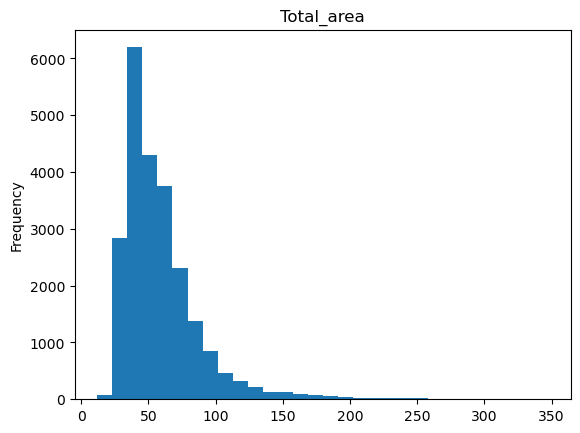

In [67]:
data['total_area'].plot(kind='hist', bins=30, title='Total_area');

На графике видно, что большинство объектов недвижимости имеют площадь около 50 кв метров. 

Посмотрим график столбца living_area (жилая площадь). 

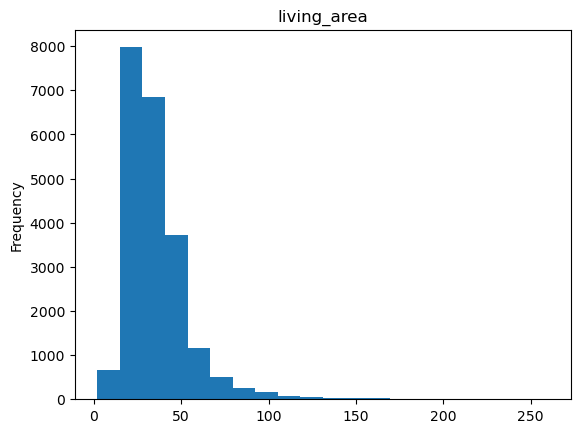

In [68]:
data['living_area'].plot(kind='hist', bins=20, title='living_area');

Наибольшее количество объектов с жилой площадью до 50 кв. метров. Далее идут объекты с площадью от 50 до 190 кв. метров. 

Теперь построим график для столбца kitchen_area (площадь кухни). 

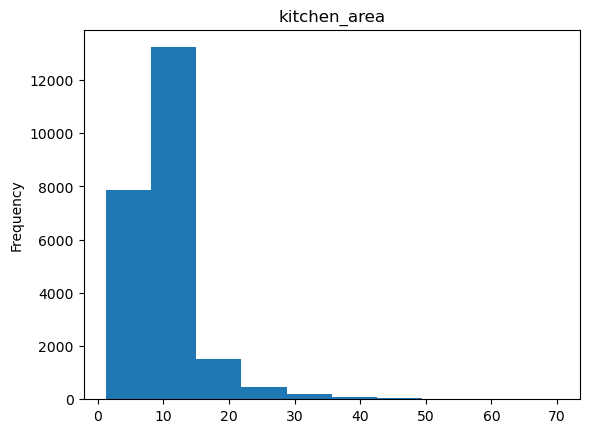

In [69]:
data['kitchen_area'].plot(kind='hist', bins=10, title='kitchen_area');

Наибольшее количество объектов с площадью кухни менее 10 кв. метров, далее по убывающей до 60 кв.метров

Построим график для столбца last_price (Цена объекта) и изучим его особенности. 

In [70]:
data['last_price'] = data['last_price'] / 1000000

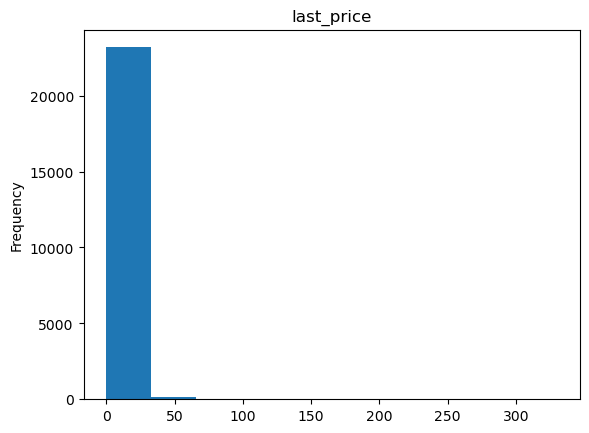

In [71]:
data['last_price'].plot(kind='hist', bins=10, title='last_price');

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Уберем оставшиеся аномальные значения в столбце last_price, значения где стоимость объекта недвижимости более 700 млн. 
</div>

In [72]:
data = data[data['last_price'] <= 700]

In [73]:
data['last_price'].describe()

count    23418.000000
mean         6.325857
std          7.827650
min          0.012190
25%          3.450000
50%          4.650000
75%          6.790000
max        330.000000
Name: last_price, dtype: float64

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Разделим значения в столбце last_price на 1 млн для большей информативности. С помощью функции describe видно, что средняя стоимость объекта недвижимости составляет 8 млн. руб. Максимальная 330 млн. руб. Закономерность следующая: чем выше стоимость объекта недвижимость тем меньше таких объектов было на рынке недвижимости.
</div>

Построим гистограмму для столбца rooms (количество комнат) и определим особенности.

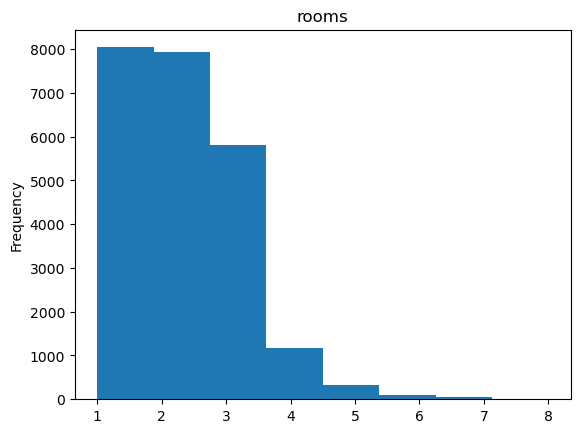

In [74]:
data['rooms'].plot(kind='hist', bins=data['rooms'].max(), title='rooms');

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> При построении гистограммы укажем количество корзин равное максимальному числу комнат в столбце.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Больше всего объектов недвижимости с количеством комнат равным 1 и 2. Также есть небольшое количество объектов недвижимости с количеством комнат от 5 до 8.
</div>

Построим график для столбца ceiling_height (высота потолков).

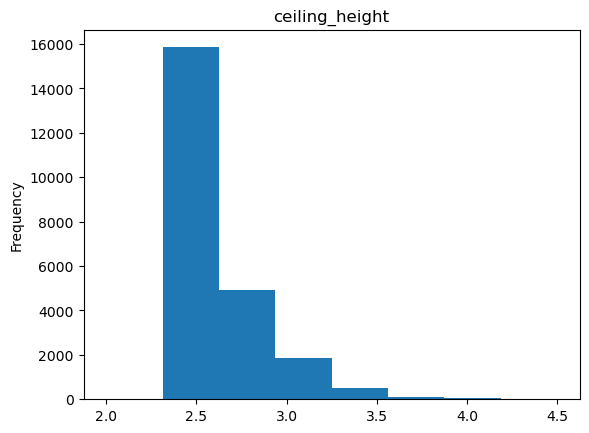

In [75]:
data['ceiling_height'].plot(kind='hist', bins=8, title='ceiling_height');

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Изучим гистограмму столбца ceiling_height (высота потолков). Самая часто встречающаяся высота 2.5 метра - более чем у 15000 тысяч объявлений. Максимальная высота потолков достигает 4,5 метра.
</div>

Построим график для столбца floor (этаж квартиры). 

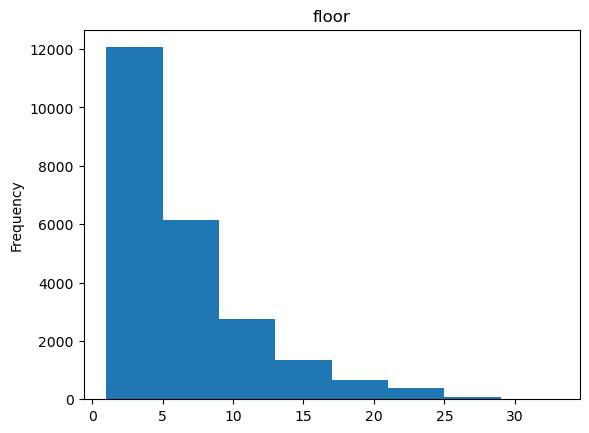

In [76]:
data['floor'].plot(kind='hist', bins=8, title='floor');

Больше всего объявлений с объектами недвижимости расположеными не выше 5 этажа. Данная особенность связана с жилищным фондом города Санкт-Перебург и Ленинградской области. Суммарная доля высотных жилых домов (от 10) намного меньше чем невысотных жилых домов (до 10). 

Построим диаграмму для столбца type_floor (тип этажа).

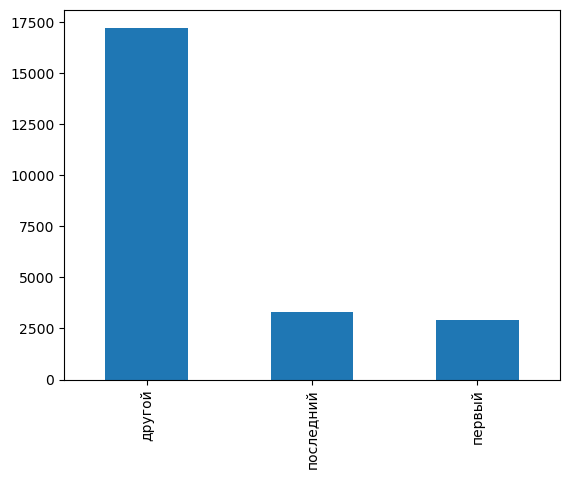

In [77]:
data['type_floor'].value_counts().plot.bar();

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Как видно на графике, наибольшее количество объявлений с типом этажа("другой") - более 17000. Количество объявлений в которых объект недвижимости расположен на первом либо последнем этаже практически равно. 
</div>

Построим гистограмму для столбца floors_total (всего этажей в доме) и изучим особенности.

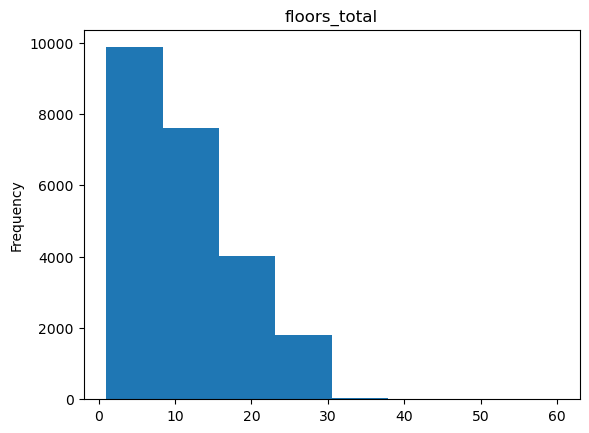

In [78]:
data['floors_total'].plot(kind='hist', bins=8, title='floors_total');

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Наибольшее количество объектов недвижимости с этажностью до 9 этажей. На втором месте по количеству объявлений - дома с этажностью до 15. Доля домов с количеством этажей более 15 значительно меньше.
</div>

Построим диаграмму для столбца cityCenters_nearest (расстояние до центра города в метрах). 

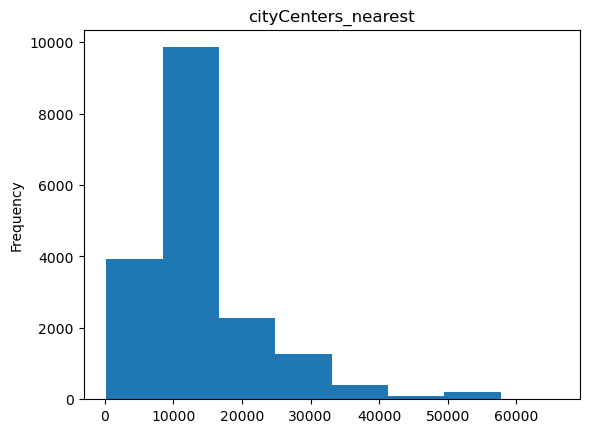

In [79]:
data['cityCenters_nearest'].plot(kind='hist', bins=8, title='cityCenters_nearest');

Наибольшее количество объектов недвижимости располагаются на расстоянии от 9 до 16 тысяч метров до центра города. 

Построим график для столбца airports_nearest (расстояние до ближайшего аэропорта).

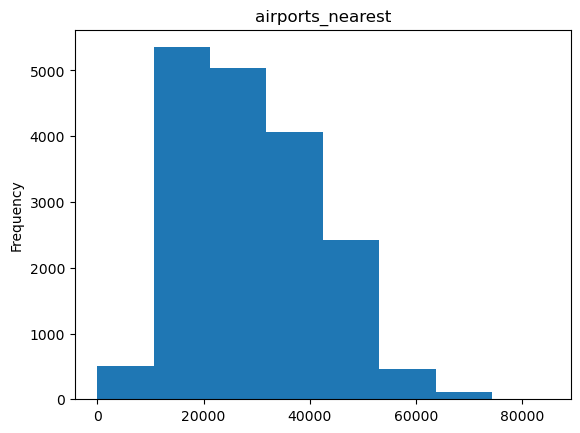

In [80]:
data['airports_nearest'].plot(kind='hist', bins=8, title='airports_nearest');

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Наибольшее количество объектов расположенно от аэропорта на расстоянии от 15 тыс до 25 тыс метров. Наименьшее количество объектов расположенно на растоянии от 60 тыс. метров и далее.
</div>

Построим гистограмму для столбца parks_nearest (расстояние до ближайшего парка).

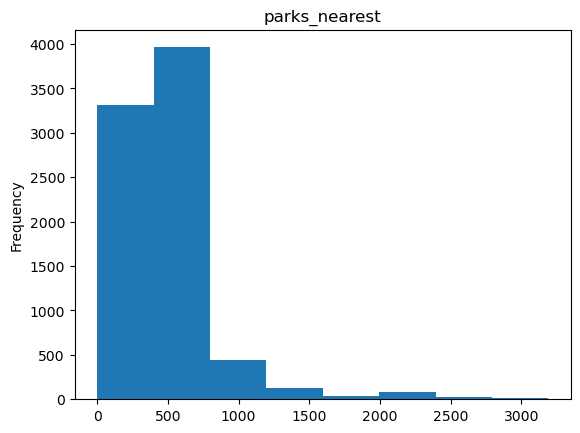

In [81]:
data['parks_nearest'].plot(kind='hist', bins=8, title='parks_nearest');

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Наибольшее количество объектов недвижимости расположены на расстоянии от 400 до 700 метров от ближайшего парка. Наименьшее количество объектов расположены на расстоянии от 1500 до 1900 метров и от 2600 до 3000 метров.
</div>

Построим гистограмму для столбца weekday_exposition (день публикации объявления).

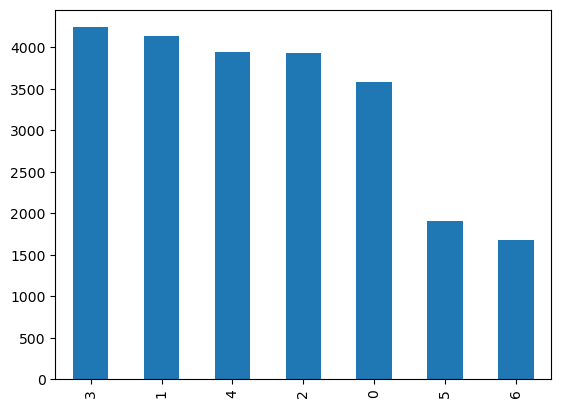

In [82]:
data['weekday_exposition'].value_counts().plot.bar();

Чаще всего объявления публикуют в будние дни, наиболее популярные дни - вторник и четверг. Реже всего объявления публикуют в выходные дни. 

Посмотроим график для столбца month_exposition (месяц публикации).

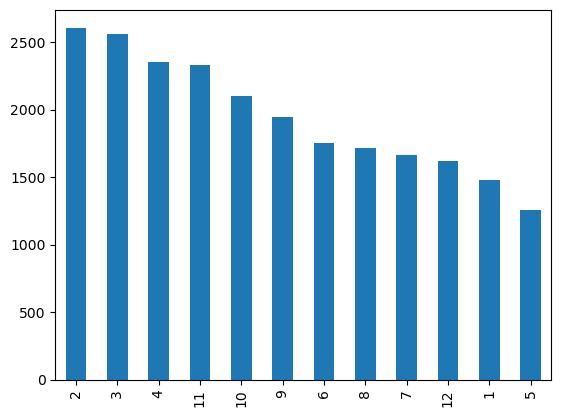

In [83]:
data['month_exposition'].value_counts().plot.bar();

Чаще всего объявления публиковали в апреле, марте и в мае. Реже всего в феврале, июле и июне. 

Построим гистограмму для столбца days_exposition (сколько дней было размещено объявление (от публикации до снятия)).

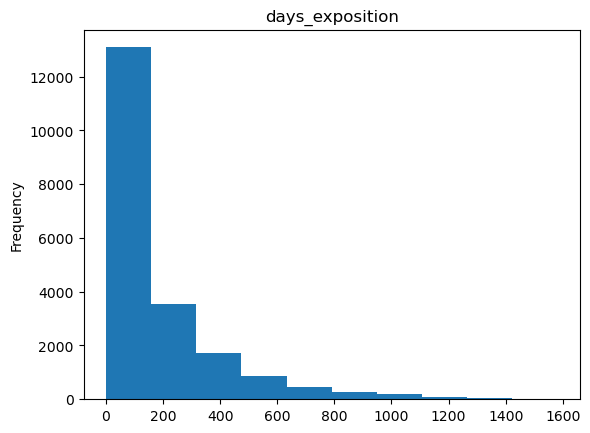

In [84]:
data['days_exposition'].plot(kind='hist', bins=10, title='days_exposition');

Как видно на графике чаще всего объявление о продаже находилось в публикации от 0 до 100 дней. Также есть небольшое количество объявлений, которые находились в публикации от 1000 до 1500+ дней. 

Посчитаем среднее значение и медиану для столбца days_exposition. Также воспользуемся функцией describe и изучим особенности продажи объектов недвижимости.

In [85]:
display(data['days_exposition'].mean())
display(data['days_exposition'].median())
display(data['days_exposition'].describe())

181.29036554684032

96.0

count    20271.000000
mean       181.290366
std        219.752581
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Среднее время продажи объекта недвижимости составляет ~ 181 день. 
Медианное время продажи объекта недвижимости составляет 96 дней. 
Минимальное время продажи составляет - 1 день, а максимальное 1580. Необычайно быстрыми продажами можно считать те, которые совершенны быстрее чем за 45 дней,а необычайно долгие - свыше 232.
</div>

# Изучение зависимости цены от различных факторов.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Построим диаграмму рассеяния для параметров last_price и total_area. 
</div>

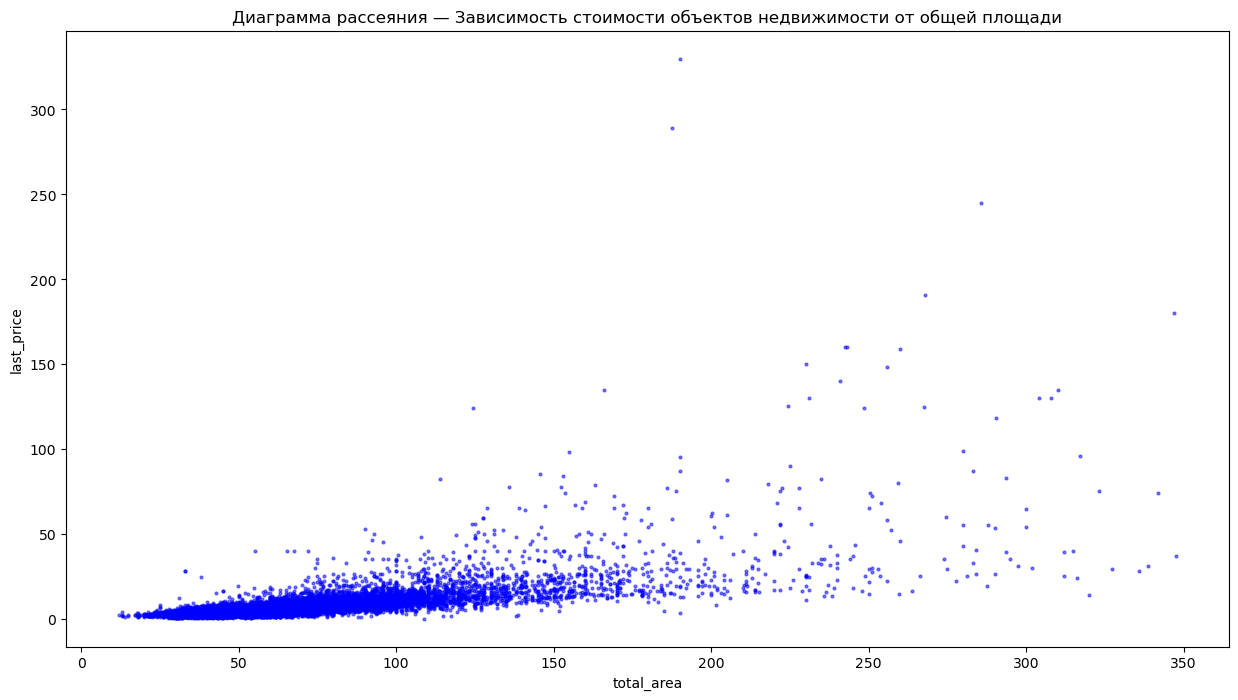

In [86]:
data.plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Зависимость стоимости объектов недвижимости от общей площади');

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Как видно на диаграмме при увеличении площади объекта его стоимость также увеличивается, но резкого роста не происходит.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Построим диаграмму рассеяния для параметров last_price и living_area. 
</div>

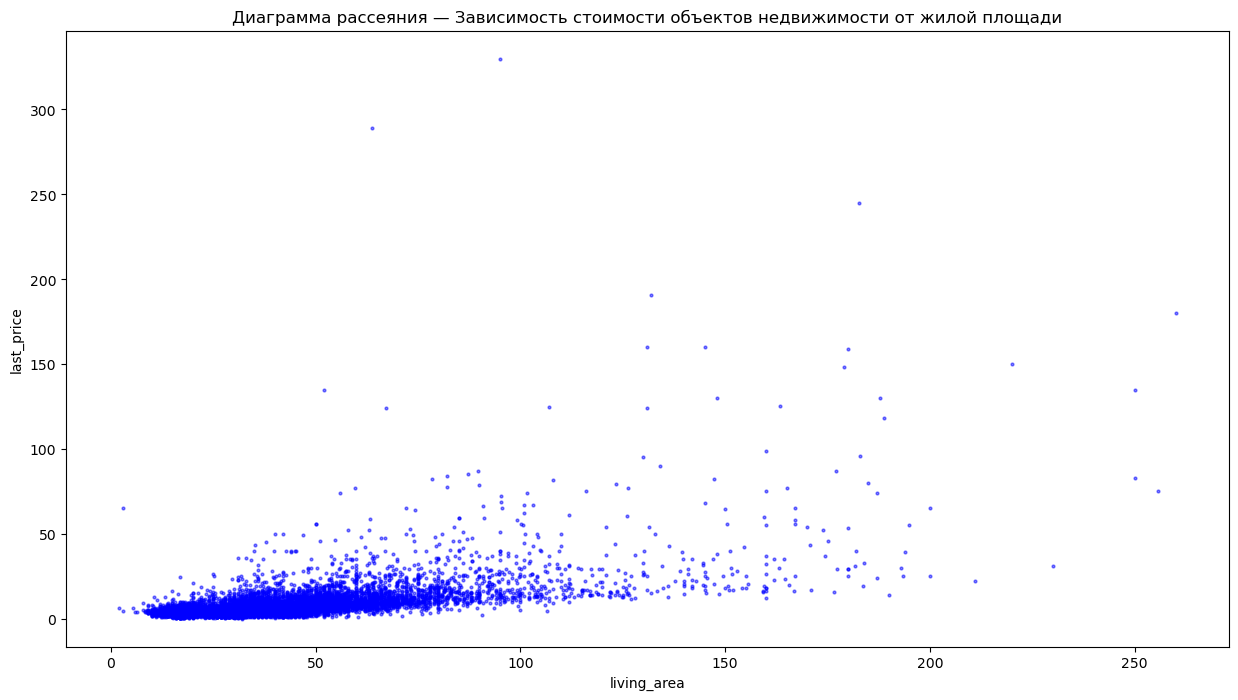

In [87]:
data.plot(kind='scatter',
        y='last_price' , x='living_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Зависимость стоимости объектов недвижимости от жилой площади');

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Диаграмма в значительной степени соответствует предыдущей. Закономерность сохраняется.  
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Построим диаграмму рассеяния для параметров last_price и kitchen_area. 
</div>

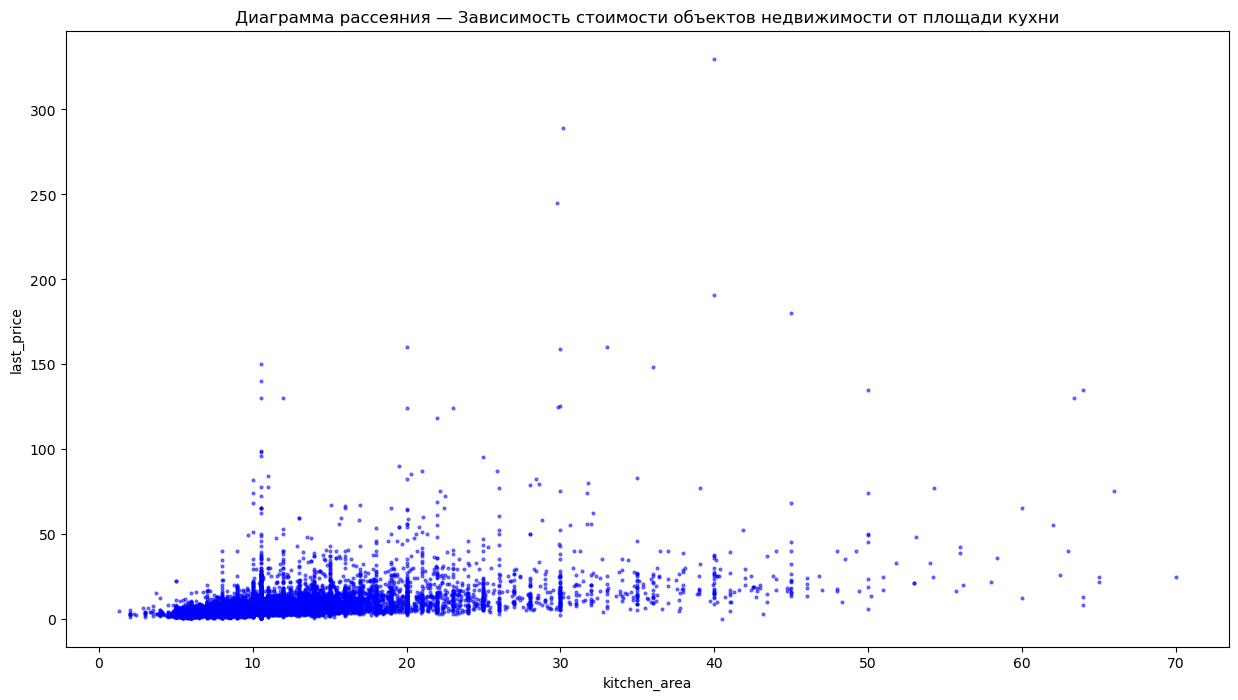

In [88]:
data.plot(kind='scatter',
        y='last_price' , x='kitchen_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Зависимость стоимости объектов недвижимости от площади кухни');

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Исходя из полученной диаграммы можно сделать вывод, что площадь кухни не оказывает значительного влияния на стоимость объекта недвижимости.  
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Построим диаграмму рассеяния для параметров last_price и rooms. 
</div>

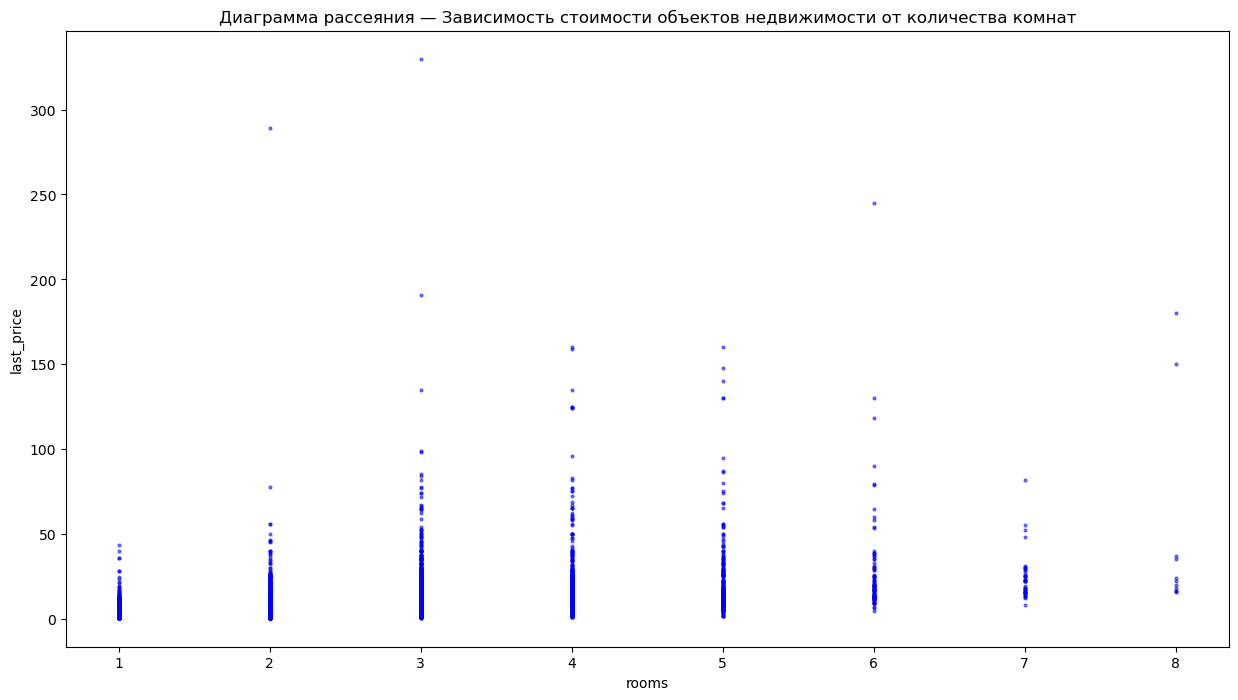

In [89]:
data.plot(kind='scatter',
        y='last_price' , x='rooms', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Зависимость стоимости объектов недвижимости от количества комнат');

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> На диаграмме рассеяния видно, что однокомнатные квартиры стоят дешевле чем остальные. Количество комнат более 3 не оказывает чрезмерного влияния на увеличение стоимости объекта недвижимости. 
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Построим матрицу корреляции для таких параметров как: общая площадь, жилая площадь, площадь кухни и количество комнат.  
</div>

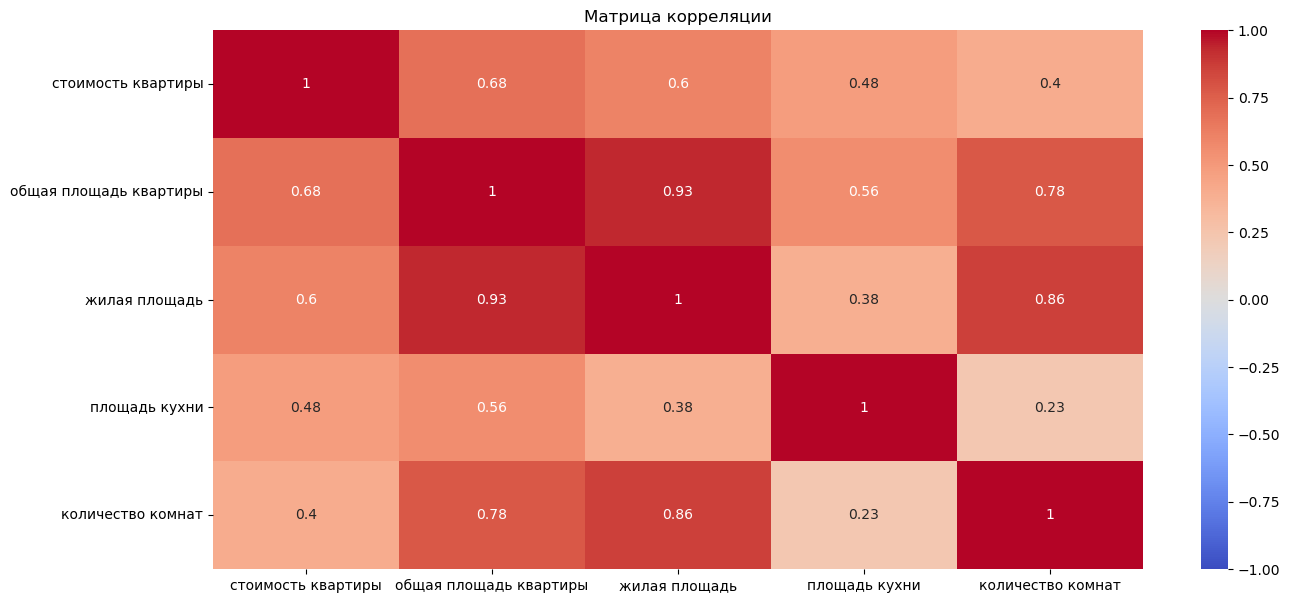

In [90]:
corr_param = [
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms']
 
corr_labels = [
    'стоимость квартиры',
    'общая площадь квартиры',
    'жилая площадь',
    'площадь кухни',
    'количество комнат']
 
corr_matrix = data[corr_param].corr()
 
plt.figure(figsize = (15, 7))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=corr_labels,
            xticklabels=corr_labels)
plt.title('Матрица корреляции')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Исходя из матрицы корреляции можем определить степень значимости параметров объекта недвижимости в формировании цены:
1) Общая площадь квартиры 
2) жилая площадь
3) площадь кухни 
4) количество комнат   
</div>

Проверим как влияет тип этажа на стоимость объекта недвижимости. Построим столбчатую диаграмму.

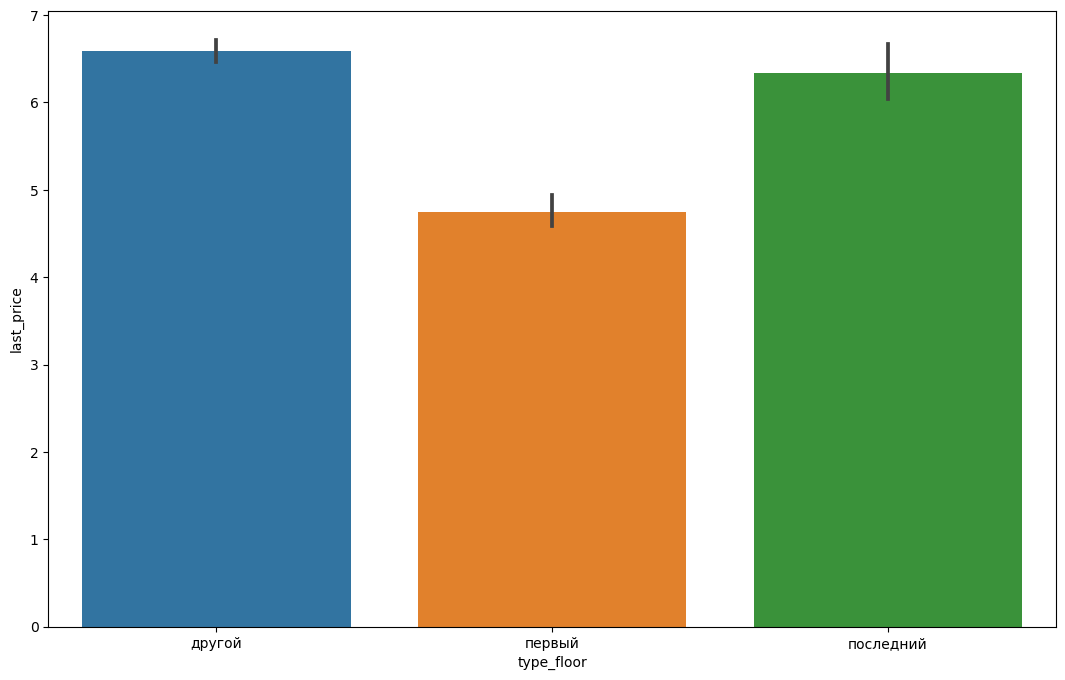

In [91]:
plt.figure(figsize = (13,8))
ax = sns.barplot(x=data['type_floor'],y=data['last_price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0);

Как видно на графике объекты недвижимости расположенные на первом этаже стоят дешевле чем на прочих этажах. Стоимость квартир расположенных на других этажах чуть дороже чем на последнем этаже.

Построим гистограмму и проверим есть ли зависимость между стоимостью объекта и датой публикации(день недели, месяц, год)

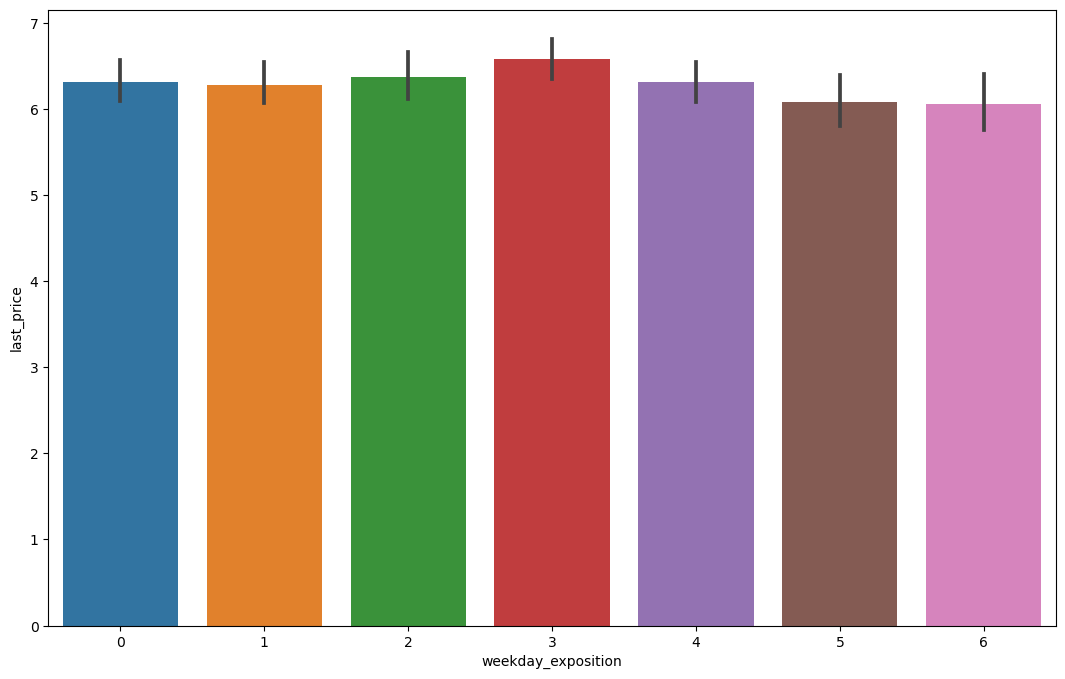

In [92]:
plt.figure(figsize = (13,8))
ax = sns.barplot(x=data['weekday_exposition'],y=data['last_price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0);

Как видно на графике в понедельник, вторник и среды - стоимость объектов недвижимости практически в одном ценовом диапозоне. Самые дорогие предложения публиковались в четверг,а наименьшие по стоимости в субботу. 

Построим аналогичную диаграмму для столбца month_exposition (месяц публикации).

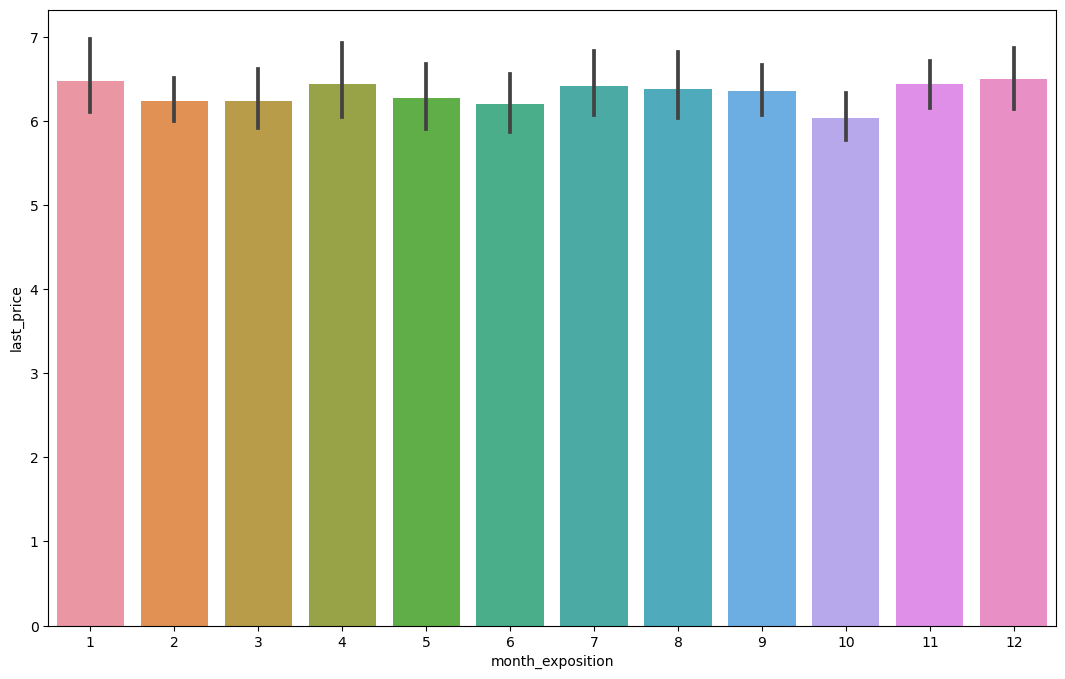

In [93]:
plt.figure(figsize = (13,8))
ax = sns.barplot(x=data['month_exposition'],y=data['last_price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0);

На столбчатой диаграмме можем наблюдать корреляцию месяца публикации и стоимости объекта недвижимости.
Максимальная стоимость продажи наблюдалась в декабре, апреле и январе. Минимальная в марте, июне и феврале.

Проверим взаимосвязь стоимости и года публикации объявления. Для этого построим столбчатую диаграмму аналогично предыдущим.

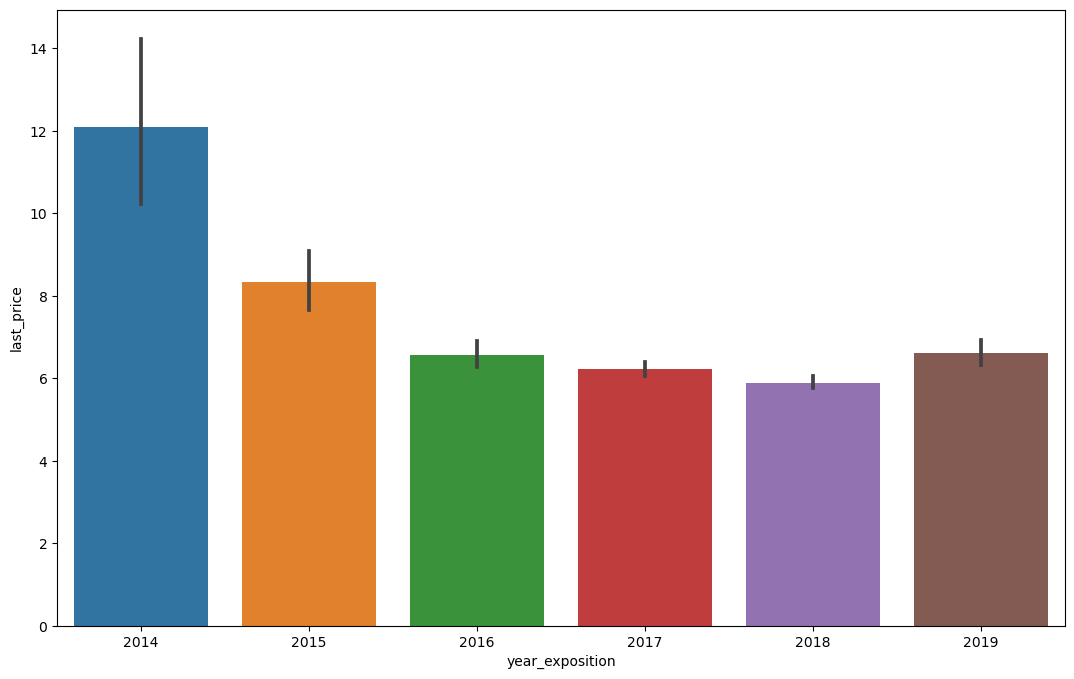

In [94]:
plt.figure(figsize = (13,8))
ax = sns.barplot(x=data['year_exposition'],y=data['last_price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0);

Как видно на диаграмме - рынок недвижимости начал падение после 2014 года. Вероятно это обусловлено резким изменением курса валют, снижение покупательской способности и замедлением темпов строительства новых объектов недвижимости. 2016 и 2017 года показывают практически идентичный результат, в 2018 году фиксируется рекордное падение представленное в текущем датасете. Далее в 2019 году отмечается возобновление роста.

# Изучение средней стоимости квадратного метра в топ 10 населенных пунктах

Выберем топ 10 городов с самым большим количеством объявлений. Для этого создадим новую переменную в которой воспользуемся методом value_counts и head. 
Далее воспользуемся срезом данных и создадим сводную таблицу в которой в качестве значений укажем стоимость 1 кв. метра. 
Преобразуем полученные значения в формат int. 
Выполним сортировку с помощью метода sort_values и сделаем группировку по убыванию. 

In [95]:
top_10 = data['locality_name'].value_counts().head(10)
top_10_price = data.query('locality_name in (@top_10.index)').pivot_table(values='1meter_price', index='locality_name')
top_10_price = top_10_price.astype(int)
top_10_price.sort_values('1meter_price', ascending=False)

,1meter_price
locality_name,
Санкт-Петербург,114144
Пушкин,103130
деревня Кудрово,95150
посёлок Парголово,90289
посёлок Мурино,85442
посёлок Шушары,78405
Колпино,75424
Гатчина,68745
Всеволожск,68617


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Самый дорогой город - это Санкт-Петербург, который является областным центром. В нем стоимость 1 кв. метра жилья составляет 114 144 руб. Самый недорогой город из данного перечня - Выборг. Стоимость 1 кв. метра равняется 58 141 руб. 
</div>

# Изучение стоимости километра до центра г. Санкт-Петербурга

Попробуем определить стоимость каждого километра до центра города для квартир расположенных в г. Санкт-Петербург.
Для этого сделаем срез данных в столбце locality_name в котором укажем название г. Санкт-Петербург и создадим функцию, которая сгруппирует объекты недвижимости в зависимости от удаленности от центра. 

In [96]:
data['city_center_km'] = data['city_center_km'].astype('float64')
spb_realty = data.query('locality_name=="Санкт-Петербург" and not(city_center_km.isna())')    

0    2
1    2
2    2
3    1
4    1
5    3
6    2
7    2
8    3
9    2
Name: spb_realty, dtype: int64

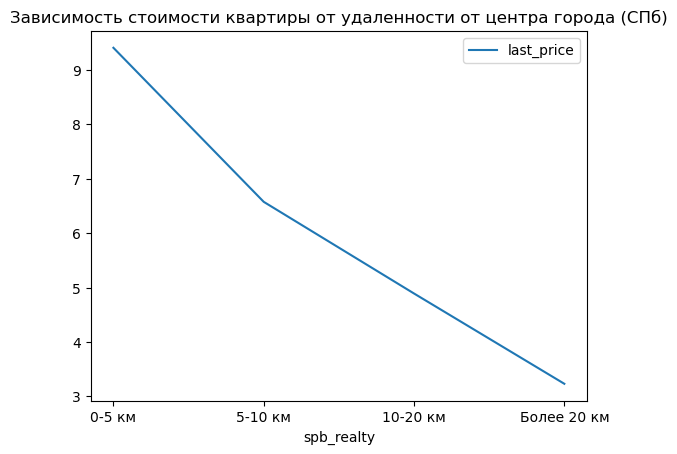

In [97]:
def spb_city_centre_km (row):
    if 0 < row <= 5:
        return 0
    elif row  <= 10:
        return 1
    elif 10 < row < 20:
        return 2
    else:
        return 3
data['spb_realty'] = data['city_center_km'].apply(spb_city_centre_km)
display(data['spb_realty'].head(10))
 
table = data.pivot_table(index='spb_realty', values='last_price', aggfunc='median')
table.plot()
plt.xticks(range(0, len(table.index)), ['0-5 км', '5-10 км', '10-20 км', 'Более 20 км'])
 
plt.title('Зависимость стоимости квартиры от удаленности от центра города (СПб)');

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Как видно на графике стоимость объекта недвижимости увеличивается прямо пропорционально близости к центру города.
</div>

Далее произведем расчёт медианной стоимости 1 км до центра города. Для этого сделаем срез данных, который использовали ранее.
Создадим столбец 1km_center_price (стоимость 1 км до центра города).

In [98]:
spb_realty = data.query('locality_name=="Санкт-Петербург" and not(city_center_km.isna())')

try:
    spb_realty['1km_center_price'] = data['last_price']/data['city_center_km']
except:
    pass

C:\Users\truel\AppData\Local\Temp\ipykernel_3396\82735538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_realty['1km_center_price'] = data['last_price']/data['city_center_km']


In [99]:
display(spb_realty['1km_center_price'].median())

0.45

Медианная стоимость 1 км до центра г. Санкт-Петербурга составляет 450 тыс. рублей.

### Общий вывод

На основании полученных данных можно сделать определенные выводы касательно рынка недвижимости г. Санкт-Петербурга и Ленинградской области. 


1) Кризис рынка недвижимости.

В датасете представлены данные за период с 2014 по 2019 год. В результате анализа было установлено общее снижение стоимости объектов недвижимости, начиная с 2015 года, а рекордное падение было зафиксировано в 2018 году. Тенденция на дальнейший рост наметилась лишь в 2019 году. 

2) Квартиры на последнем этаже стоят дороже, чем на первом/других этажах. 

Вероятно, данная особенность обусловлена тем, что покупатели готовы переплачивать за вид из окна. Квартиры на первых этажах стоят значительно дешевле, чем на других. Это связано с низкой ликвидностью, которая обусловлена рядом факторов (шум под окнами, высокая уязвимость для воров, попадание посторонних запахов из подвала). 

3) На стоимость объекта недвижимости в первую очередь влияет его местоположение.

В результате исследования установлено, что объекты недвижимости расположенные как можно ближе к центру г. Санкт-Петербурга стоят значительно дороже. Остальные параметры такие как: общая площадь, жилая площадь, площадь кухни и количество комнат не оказывают значительного влияния на стоимость. 

4) Среднее время продажи объекта недвижимости.

~ 181 день (чуть больше полугода) - именно столько понадобилось в среднем для продажи объекта недвижимости. В результате исследования были зафиксированы необычайно быстрые продажи (1 день) и необычайно долгие (1580 дней). Не стоит исключать тот факт, что продавец мог передумать или забыть удалить объявление с платформы.

5) ТОП-10 населенных пунктов по количеству объявлений.
    
Самая низкая цена за 1 кв. метр зафиксирована в г. Выборг и составляет 58 141 руб. руб. 
Самая высокая цена за 1 кв. метр зафиксирована в областном центре (г. Санкт-Петербург) и составляет 114 144 руб.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод